In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
train_dir = './dataset/Train/'
test_dir = './dataset/Test/'
validation_dir = './dataset/Validation/'

# Image dimensions and batch size
img_height, img_width = 224, 224  # VGGNet requires input size of 224x224
batch_size = 32

In [3]:
# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2400 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [4]:
# Load pre-trained VGG16 without top layers
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False


In [5]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
75/75 [==============================] - 661s 9s/step - loss: 1.0693 - accuracy: 0.7792 - val_loss: 0.5655 - val_accuracy: 0.7786
Epoch 2/10
65/75 [=========================>....] - ETA: 1:29 - loss: 0.2389 - accuracy: 0.9183

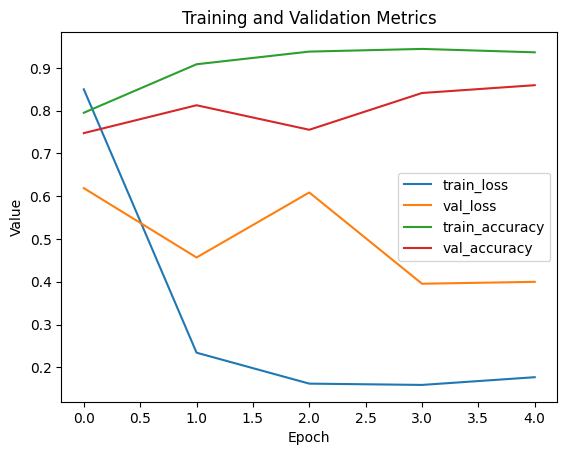

In [ ]:
# Plot loss and accuracy
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.show()

# Save the model
model.save('mask_detection_vgg_model_10.h5')

In [ ]:
from tensorflow.keras.models import load_model

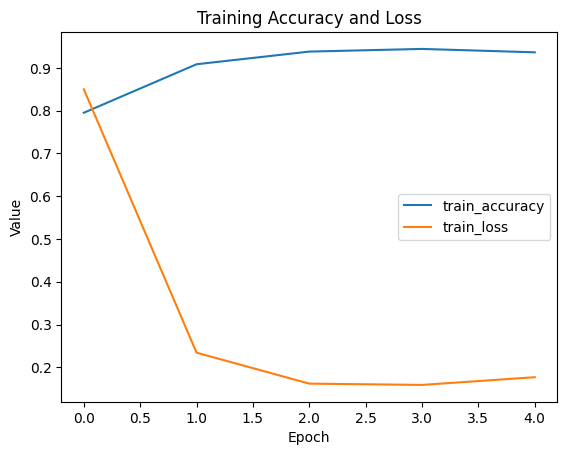

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Accuracy and Loss')
plt.legend()
plt.show()